# TIES483 ex6, Mikael Myyrä

***

1. **2 points** Study multiobjective optimization problem
$$
\begin{align}
\min & \{\|x-(1,0)\|^2,\|x-(0,1)\|^2\}\\
\text{s.t. }&x\in \mathbb R^2.
\end{align}
$$
Chacterize algebraicly (i.e. give a mathematical formulation) the full set of Pareto optimal solutions.

***

The first objective function is minimized at $x = (1, 0)$, where it gets the value 0. Likewise, the second is minimized at $x = (0, 1)$. In the objective space $\{(f_1, f_2) \in \mathbb R^2 : f_1, f_2 \geq 0\}$, the $f_1$ axis measures the squared distance from the point $(1, 0)$ and the $f_2$ axis measures the squared distance from the point $(0, 1)$.

Both objective functions can't be minimized at the same time, so the objective space has some area near the origin that can't be reached. When $f_1$ is $0$, $f_2$ is $\|(1, 0) - (0, 1)\|^2 = 2$ and vice versa. These points are connected with some curve, which is the set of Pareto optimal solutions. This is intuitively clear from the geometry, as this curve is at the bottom-left of the space and intersects with both coordinate axes.

Examining the decision space to find the aforementioned curve. A value of $f_1$ in the objective space corresponds to a circle $C_1$ with radius $\sqrt{f_1}$ centered on $(1, 0)$ in the decision space. The lowest value of $f_2$ in the set $C_1$ is at the intersection of $C_1$ and the smallest circle $C_2$ centered on $(0, 1)$ that intersects with it. This point lies on the ray from the first point towards the second, which is
$$
r(t) = (1, 0) + t((0, 1) - (1, 0)) \\
  = (1, 0) + t(-1, 1), t \geq 0
$$

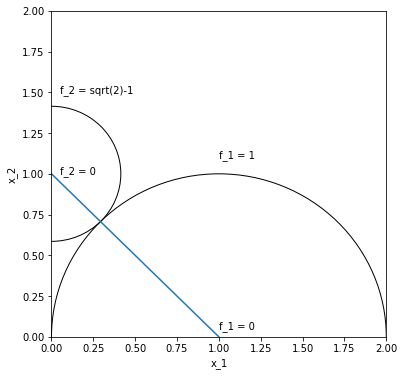

In [33]:
# visual demonstration in decision space
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.patches import Circle

plt.figure(figsize=[6, 6])
ax = plt.subplot()
plt.xlim([0, 2])
plt.xlabel('x_1')
plt.ylim([0, 2])
plt.ylabel('x_2')

plt.plot([1, 0], [0, 1])
plt.annotate("f_1 = 0", [1, 0.05])
plt.annotate("f_2 = 0", [0.05, 1])

ax.add_patch(Circle([1, 0], radius=1.0, fill=False))
plt.annotate("f_1 = 1", [1, 1.1])
ax.add_patch(Circle([0, 1], radius=math.sqrt(2.0)-1.0, fill=False))
plt.annotate("f_2 = sqrt(2)-1", [0.05, 1.5])

plt.show()

The ray starts at $(f_1 \circ r)(t) = 0$ and reaches the point $(f_2 \circ r)(t) = 0$ at $t = 1$, so we get the curve between $(2, 0)$ and $(0, 2)$ in the objective space by mapping the decision space line segment $r(t), 0 \leq t \leq 1$ to the objective space.
$$
r_f(t) = ((f_1 \circ r)(t), (f_2 \circ r)(t))\\
= (\|(1, 0) + t(-1, 1) - (1, 0)\|^2, \|(1, 0) + t(-1, 1) - (0, 1)\|^2)\\
  = (\|(-t, t)\|^2, \|(1 - t, t - 1)\|^2)\\
  = (2t^2, 2t^2 - 4t + 2)), 0 \leq t \leq 1
$$

This is the set of Pareto-optimal solutions.

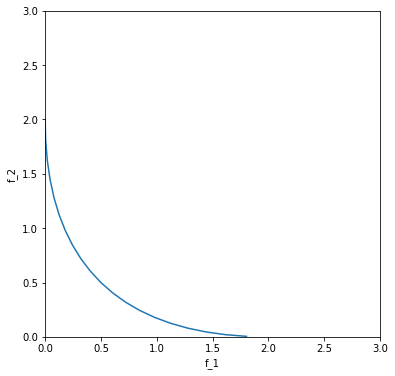

In [50]:
# Plotting the above curve

plt.figure(figsize=[6, 6])
plt.xlim([0, 3])
plt.xlabel('f_1')
plt.ylim([0, 3])
plt.ylabel('f_2')

t = np.arange(0, 1, 0.05)
plt.plot(2*t**2, 2*t**2 - 4*t + 2)

plt.show()

It's a bit hard to convert this parametric curve to an implicit form.
Proof idea using this form directly: say there's a point $x'$ for which $(x' - r_f(t)) \wedge r'(t) < 0$ and $x' \neq r_f(t)$ for some $0 \leq t \leq 1$ (in other words, $x'$ is to the left of $r_f(t)$). Show that this point can't be feasible. Geometrically a point like this would be one that's closer to both optimal points in the decision space than is physically possible.

If you're reading this, I didn't have time (or possibly forgot) to actually work through this proof after doing the rest of the exercises. :(

***

2. **2 points** Calculate the ideal and nadir vectors for the above two objective problem. You can use any methods available.

***

As shown in exercise 1, the curve of Pareto optimal solutions starts at $(2, 0)$ and ends at $(0, 2)$. Thus, we get the ideal and nadir vectors by inspection:
$$
z^{ideal} = (0, 0)\\
z^{nadir} = (2, 2)
$$

***

3. **2 points** Try to generate a representative set of Pareto optimal solutions using the weighting method for the above two objective problem. Compare this set to the set of Pareto optimal solutions from task 1. What do you notice?

***

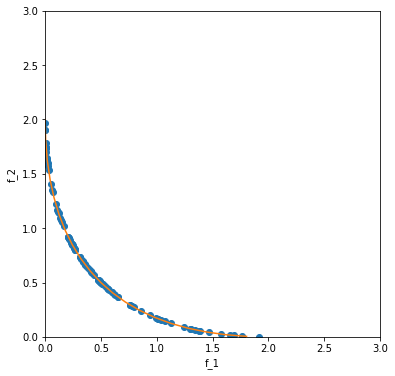

In [55]:
from scipy.optimize import minimize

objectives = [
    lambda x: (x[0] - 1)**2 + x[1]**2,
    lambda x: x[0]**2 + (x[1] - 1)**2,
]

# calculating jacobians by hand because I don't have easy access to `ad`
obj_jacobians = [
    lambda x: np.array([2*x[0] - 2, 2*x[1]]),
    lambda x: np.array([2*x[0], 2*x[1] - 2]),
]

def weighted_objective(weights, x):
    return sum([w * obj(x) for (w, obj) in zip(weights, objectives)])

def weighted_jacobian(weights, x):
    return sum([w * jac(x) for (w, jac) in zip(weights, obj_jacobians)])

def gen_points_weighted(count):
    """Generate a set of Pareto optimal points
    for the problem defined in exercise 1
    using a random set of weights.
    """
    weights = np.random.random((count, 2))
    
    def find_point(weight):
        return minimize(
            fun=lambda x: weighted_objective(weight, x),
            x0=[1, 1],
            jac=lambda x: weighted_jacobian(weight, x),
            method='SLSQP',
            bounds=((0, 2), (0, 2)),
            options={"disp": False, "ftol": 1e-20, "maxiter": 1000},
        ).x
        
    return [find_point(w) for w in weights]

# plot a set of points generated by the above

plt.figure(figsize=[6, 6])
plt.xlim([0, 3])
plt.xlabel('f_1')
plt.ylim([0, 3])
plt.ylabel('f_2')

points = gen_points_weighted(100)
obj_values = [[obj(x) for x in points] for obj in objectives]
plt.plot(obj_values[0], obj_values[1], 'o')

# exact curve from exercise 1 for comparison
t = np.arange(0, 1, 0.05)
plt.plot(2*t**2, 2*t**2 - 4*t + 2)

plt.show()

Looks like we get a very close approximation of the exact curve, so probably both my weighting method code and my calculation from exercise 1 are correct. Because the curve is convex, we get a rather even distribution of points over the entire curve.

***

4. **2 points** Show
  1. that an optimal solution to the weighting method is Pareto optimal, if the weights $w_i>0$ for all $i=1,\ldots,k$, and
  2. that an optimal solution $x^*$ to the epsilon constraint method is Pareto optimal, if it is an optimal solution to the epsilon constraint method for all $j=1,\ldots,k$ and $\epsilon=f(x^*)$.

***

A.

Let $x^*$ be a minimizer of the weighted function
$$
f_w(x) = \sum_{i=1}^k w_i f_i(x).
$$
By definition, this means no vector $x'$ exists for which $f_w(x^* + x') < f_w(x^* + x')$.

If $x^*$ is not Pareto optimal, then there is some vector $x'$ for which
$$
\begin{cases}
f_i(x^* + x') \leq f_i(x^*)\text{ for all }i\in \{1,\ldots,k\}\\
f_j(x^* + x') < f_j(x^*) \text{ for some }j\in \{1,\ldots,k\}.\\
\end{cases}
$$

Because $w_i > 0$ for all $w_i$ (otherwise we could get $0 f_j(x^* + x') = 0 f_j(x^*) = 0$ for for every $j$ where the second Pareto optimality condition holds), this leads to
$$
\begin{cases}
w_i f_i(x^* + x') \leq w_i f_i(x^*)\text{ for all }i\in \{1,\ldots,k\}\\
w_j f_j(x^* + x') < w_j f_j(x^*) \text{ for some }j\in \{1,\ldots,k\}\\
\end{cases}
$$

and ultimately
$$
\sum_{i=1}^k w_i f_i(x^* + x') < \sum_{i=1}^k w_i f_i(x^*)\\
f_w(x^* + x') < f_w(x^*).
$$

This contradicts with the initial assumption that $x^*$ is a minimizer of $f_w$, therefore a non-Pareto optimal point cannot be a minimizer of $f_w$.